# MNIST GAN 0.2

This notebook primarily serves to test whether the refactoring of the training logic into the GAN itself has been successful.

**Objectives:**

- Test whether progress images and loss history saves correctly.
- Train a GAN to generate MNIST images. Inspect performance.

In [76]:
from google.colab import files

In [47]:
import mnist_example as mnist_ex
import gan
from importlib import reload
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.backend import clear_session

import pickle

In [5]:
reload(mnist_ex)

<module 'mnist_example' from '/content/mnist_example.py'>

In [6]:
mnist_ex.preprocess_real(save_only=True)

In [9]:
real_train, real_test = pickle.load(open("mnist_train_tuple.p", "rb"))

In [10]:
real_train.shape

(60000, 32, 32, 1)

In [48]:
reload(gan)

<module 'gan' from '/content/gan.py'>

In [49]:
clear_session()
model = gan.GAN(x_shape=real_train.shape[1:], kernal_size=5, 
                latent_dims=50, verbose=True)

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               26112     
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
reshape (Reshape)            (None, 2, 2, 128)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 4, 4, 64)          204864    
_________________________________________________________________
batch_normalization_5 (Batch (None, 4, 4, 64)          256       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 4, 4, 64)          0 

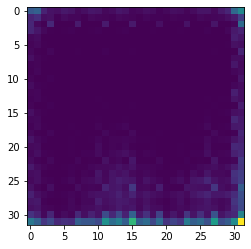

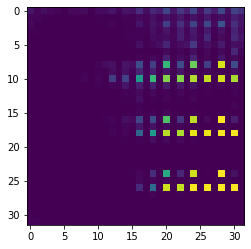

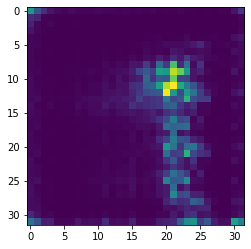

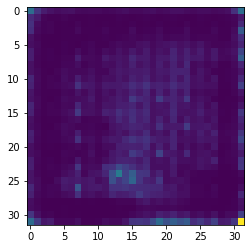

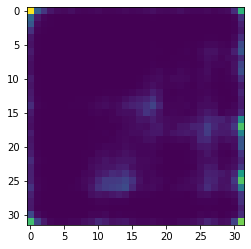

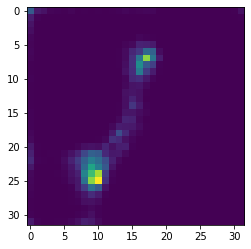

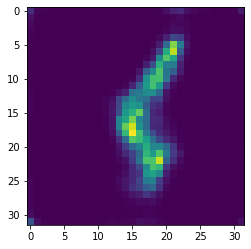

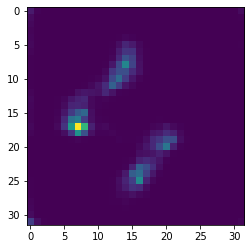

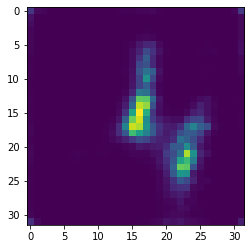

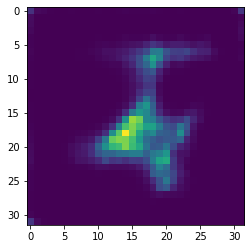

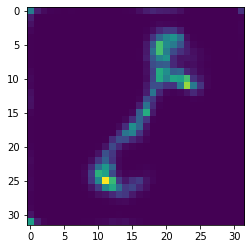

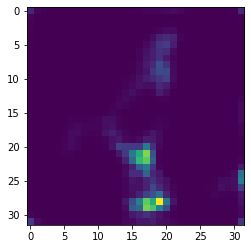

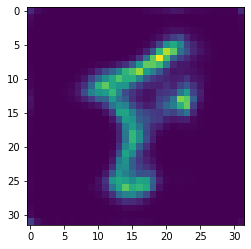

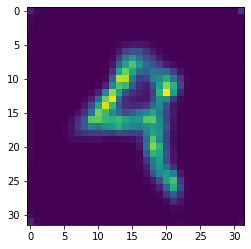

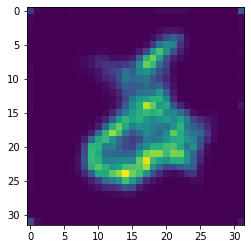

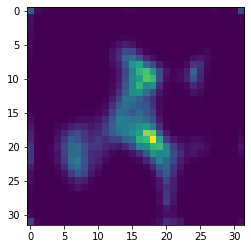

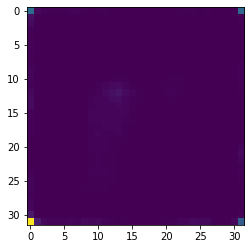

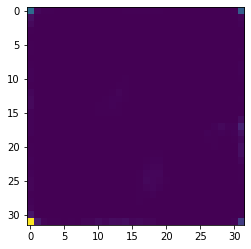

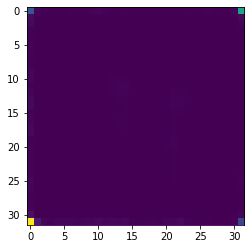

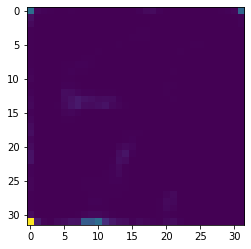

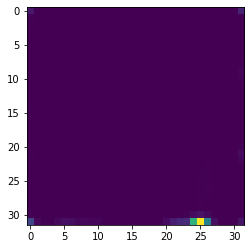

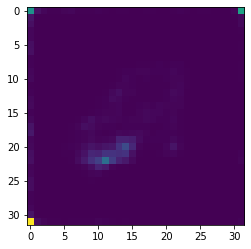

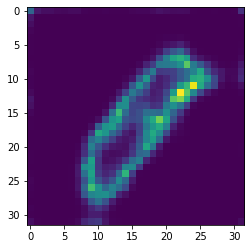

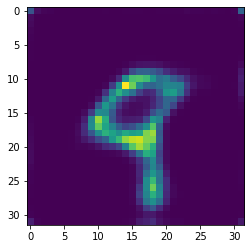

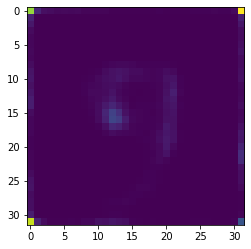

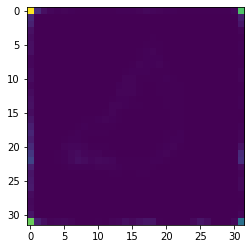

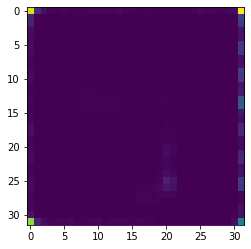

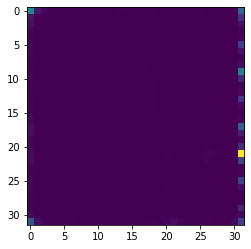

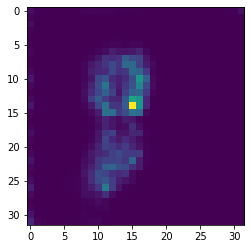

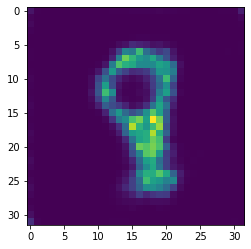

In [50]:
model.train(real_train, num_epochs=30, batch_size=30)

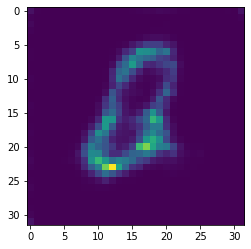

In [70]:
fake_img = model.generator.predict(np.random.randn(1, 50))
plt.imshow(fake_img.reshape(32, 32))
plt.show()

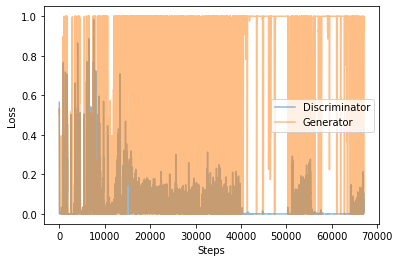

In [74]:
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.plot(model.history.disc_loss, label="Discriminator", alpha=0.5)
plt.plot(model.history.gen_loss, label="Generator", alpha=0.5)
plt.legend()
plt.show()

In [78]:
!zip -r /content/temp_file.zip /content/Training_Runs
files.download("/content/temp_file.zip")
!rm temp_file.zip

updating: content/Training_Runs/ (stored 0%)
updating: content/Training_Runs/0c86d24c-7801-4ee2-9e13-5c9b98454ca3/ (stored 0%)
updating: content/Training_Runs/0c86d24c-7801-4ee2-9e13-5c9b98454ca3/img_epoch5.png (deflated 13%)
updating: content/Training_Runs/0c86d24c-7801-4ee2-9e13-5c9b98454ca3/img_epoch4.png (deflated 13%)
updating: content/Training_Runs/0c86d24c-7801-4ee2-9e13-5c9b98454ca3/img_epoch30.png (deflated 15%)
updating: content/Training_Runs/0c86d24c-7801-4ee2-9e13-5c9b98454ca3/img_epoch13.png (deflated 15%)
updating: content/Training_Runs/0c86d24c-7801-4ee2-9e13-5c9b98454ca3/img_epoch8.png (deflated 16%)
updating: content/Training_Runs/0c86d24c-7801-4ee2-9e13-5c9b98454ca3/img_epoch26.png (deflated 17%)
updating: content/Training_Runs/0c86d24c-7801-4ee2-9e13-5c9b98454ca3/img_epoch6.png (deflated 16%)
updating: content/Training_Runs/0c86d24c-7801-4ee2-9e13-5c9b98454ca3/img_epoch12.png (deflated 16%)
updating: content/Training_Runs/0c86d24c-7801-4ee2-9e13-5c9b98454ca3/img_epoc

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>